# Cris Chou
# Textclass2

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Dataset https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification
df = pd.read_csv('/content/drive/MyDrive/CS4395/textclass2/data/ecommerceDataset.csv',header=None,names=['Category','Description']).astype(str)
df.shape

(50425, 2)

In [ ]:
df.head()

,Category,Description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [ ]:
df['Category'].value_counts()

Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: Category, dtype: int64

In [ ]:
import seaborn as sb

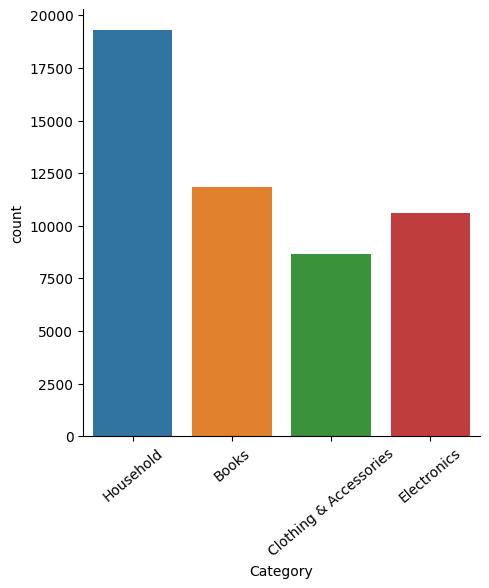

In [ ]:
graph = sb.catplot(x='Category', kind='count', data=df)
graph.set_xticklabels(rotation=40)


The dataset is a collection of ecommerce items, and their descriptions. The model should be able to predict the category of each item based on the item description. 

## Building Sequential Model

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras
from tensorflow.python.keras import layers, models

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder

## Preprocessing

In [ ]:
i = np.random.rand(len(df)) < 0.75
train = df[i]
test = df[~i]
print("train data size: ", train.shape)
print("test data size: ", test.shape)

train data size:  (37691, 2)
test data size:  (12734, 2)


In [ ]:
num_labels = 4
vocab_size = 10000
batch_size = 100

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train.Description)

In [ ]:
x_train = tokenizer.texts_to_matrix(train.Description, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test.Description, mode='tfidf')

In [ ]:
encoder = LabelEncoder()
encoder.fit(train.Category)
y_train = encoder.transform(train.Category)
y_test = encoder.transform(test.Category)

In [ ]:
print("train shapes:", x_train.shape, y_train.shape)
print("test shapes:", x_test.shape, y_test.shape)
print("test first five labels:", y_test[:5])

train shapes: (40293, 20000) (40293,)
test shapes: (10132, 20000) (10132,)
test first five labels: [3 3 3 3 3]


In [ ]:
model = models.Sequential()
model.add(layers.Dense(32, input_dim=vocab_size, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(4, kernel_initializer='normal', activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=30,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/30
363/363 [==============================] - 7s 9ms/step - loss: 0.3073 - accuracy: 0.9263 - val_loss: 1.6060 - val_accuracy: 0.6502
Epoch 2/30
363/363 [==============================] - 2s 6ms/step - loss: 0.0514 - accuracy: 0.9912 - val_loss: 1.6828 - val_accuracy: 0.6892
Epoch 3/30
363/363 [==============================] - 2s 6ms/step - loss: 0.0214 - accuracy: 0.9966 - val_loss: 2.3209 - val_accuracy: 0.6586
Epoch 4/30
363/363 [==============================] - 3s 7ms/step - loss: 0.0140 - accuracy: 0.9977 - val_loss: 2.0551 - val_accuracy: 0.7148
Epoch 5/30
363/363 [==============================] - 3s 8ms/step - loss: 0.0096 - accuracy: 0.9983 - val_loss: 2.3494 - val_accuracy: 0.7043
Epoch 6/30
363/363 [==============================] - 2s 6ms/step - loss: 0.0089 - accuracy: 0.9985 - val_loss: 2.5047 - val_accuracy: 0.6947
Epoch 7/30
363/363 [==============================] - 2s 6ms/step - loss: 0.0070 - accuracy: 0.9989 - val_loss: 2.7209 - val_accuracy: 0.6850
Epoch 

In [ ]:
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Accuracy: ', score[1])

102/102 [==============================] - 1s 5ms/step - loss: 0.5789 - accuracy: 0.9569
Accuracy:  0.9568846821784973


## CNN model

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
model = models.Sequential()
model.add(layers.Embedding(vocab_size,16))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(4,kernel_initializer='normal',activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=32,epochs=7, verbose=1, validation_split=0.3)

Epoch 1/7
1657/1657 [==============================] - 25s 14ms/step - loss: 0.8576 - accuracy: 0.6260 - val_loss: 55.5334 - val_accuracy: 0.0000e+00
Epoch 2/7
1657/1657 [==============================] - 20s 12ms/step - loss: 0.6790 - accuracy: 0.7375 - val_loss: 57.5564 - val_accuracy: 0.0000e+00
Epoch 3/7
1657/1657 [==============================] - 22s 13ms/step - loss: 0.6318 - accuracy: 0.7565 - val_loss: 62.6023 - val_accuracy: 0.0012
Epoch 4/7
1657/1657 [==============================] - 20s 12ms/step - loss: 0.5935 - accuracy: 0.7711 - val_loss: 69.4128 - val_accuracy: 0.0108
Epoch 5/7
1657/1657 [==============================] - 20s 12ms/step - loss: 0.5606 - accuracy: 0.7816 - val_loss: 72.0114 - val_accuracy: 0.0629
Epoch 6/7
1657/1657 [==============================] - 20s 12ms/step - loss: 0.5322 - accuracy: 0.7935 - val_loss: 80.4542 - val_accuracy: 0.0163
Epoch 7/7
1657/1657 [==============================] - 22s 13ms/step - loss: 0.5087 - accuracy: 0.8053 - val_loss: 8

In [ ]:
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Accuracy: ', score[1])

26/26 [==============================] - 2s 70ms/step - loss: 25.9278 - accuracy: 0.5734
Accuracy:  0.5733864307403564


## RNN

In [ ]:
model = models.Sequential()
model.add(layers.Embedding(vocab_size, 32))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(4,kernel_initializer='normal',activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=32,epochs=7, verbose=1, validation_split=0.3)

Epoch 1/7
  1/825 [..............................] - ETA: 5:14:01 - loss: 1.3850 - accuracy: 0.3438

KeyboardInterrupt: ignored

## Analysis


The standard sequential model worked the best on the data. It had a 95.7% accuracy compared to the CNN model which only had a overall 57.3% accuracy. The RNN model had a very long wait time to run so I was unable to run it. When looking at the val_accuracy for CNN, and RNN, they were both extremely low, which points to there being issues with the parameters I gave. 
